# Neural Network to Read Handwriting


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset
#### The mnist dataset is loaded from keras which contains many toy datasets. 
#### It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [2]:
mnist= tf.keras.datasets.mnist

## Dividing the images and their outputs into training and testing sets

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Cheking the dataset images, which needed to be identified by the neural network

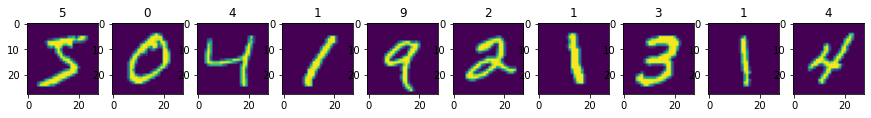

In [4]:
fig=plt.figure(figsize=(15,3))
for i in range(10):
    z=fig.add_subplot(1,10,i+1)
    z.imshow(np.squeeze(x_train[i]),cmap='viridis')
    z.set_title(y_train[i])

## Printing the data images into metrics form

In [5]:
print(x_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

## Normalizing the matrix array of number images

xmin=0 , xmax=255 <br>
Therefore x' = (x - xmin)/(xmax - xmin) simply becomes x' = x/255 <br>
The data is normalized by simply dividing by 255

In [6]:
xtrain = x_train/255.0
xtest = x_test/255.0

In [7]:
xtrain.shape

(60000, 28, 28)

In [8]:
#x_train = x_train.reshape(60000,784)
#x_test = x_test.reshape(10000,784)

In [9]:
x_train.shape

(60000, 28, 28)

## Building Neural Net

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(784,activation='relu'),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(256,activation='relu'),
                                    tf.keras.layers.Dense(10,activation='softmax')])

## Compiling model for training

In [11]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,151,258
Trainable params: 1,151,258
Non-trainable params: 0
_________________________________________________________________


## Training data into the model for 10 epochs

In [13]:
history=model.fit(x_train,y_train, epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.9822 - accuracy: 0.9044 - val_loss: 0.1634 - val_accuracy: 0.9553
Epoch 2/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.1796 - accuracy: 0.9504 - val_loss: 0.1323 - val_accuracy: 0.9627
Epoch 3/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.1504 - accuracy: 0.9581 - val_loss: 0.1877 - val_accuracy: 0.9482
Epoch 4/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.1320 - accuracy: 0.9631 - val_loss: 0.1251 - val_accuracy: 0.9668
Epoch 5/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.1181 - accuracy: 0.9680 - val_loss: 0.1358 - val_accuracy: 0.9677
Epoch 6/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.1104 - accuracy: 0.9704 - val_loss: 0.1183 - val_accuracy: 0.9715
Epoch 7/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0918 - accuracy: 0.9762 - val_loss: 0.1309 -

## Model Evaluation against testing set

In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1485 - accuracy: 0.9708


[0.1485363245010376, 0.97079998254776]

## Plotting Accuracy Graphs

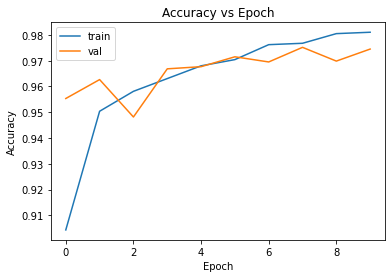

In [15]:
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history["val_accuracy"],label='val')
plt.legend()

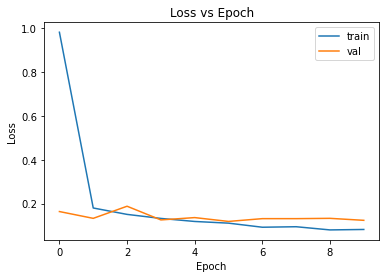

In [16]:
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label='train')
plt.plot(history.history["val_loss"],label='val')
plt.legend()

## Testing Our Model

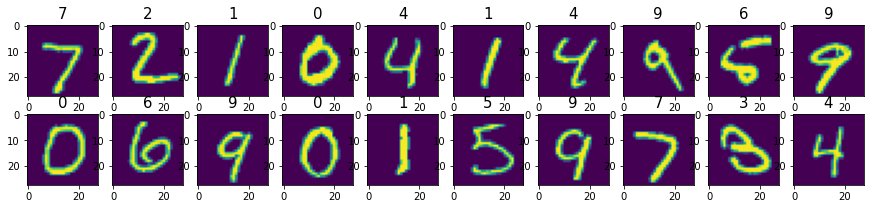

In [17]:
prediction=model.predict(x_test)
fig=plt.figure(figsize=(15,3))
for i in range(20):
    z=fig.add_subplot(2,10,i+1)
    z.imshow(np.squeeze(x_test[i]),cmap='viridis')
    z.set_title(np.argmax(prediction[i]),fontsize=15)